In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from Poisson_Cyl import Poisson_Cyl as p_solver
from Poisson_Cyl import Sphere as sph

In [4]:
NN = 64

rho = 10.0                    ## density inside sphere
R0  = 3.5                     ## radius of sphere
x0, y0, z0 = 0.0, -4.1, 4.0   ## center of the sphere

In [5]:
# Start simulation domain
run1 = p_solver(NN, method="convolution")

# get coordinate
crt_x1, crt_x2, crt_x3 = run1.get_crt_coord()

In [6]:
# Prepare for the density distribution
spheres = sph(rho, R0, x0, y0, z0, crt_x1, crt_x2, crt_x3)
spheres.add_sphere(rho, R0, 0.0, 4.1, z0)
spheres.add_sphere(rho, R0, 4.1, 0.0, z0)
spheres.add_sphere(rho, R0, -4.1, 0.0, z0)

In [7]:
# Init density distributin
run1.init_problem(spheres)

In [8]:
convl_potential = run1.solve()

In [9]:
convl_analytic  = run1.analytic_sol()
convl_error     = run1.error()
convl_error_rel = convl_error/convl_analytic
convl_L1        = run1.L1_error()
print(convl_L1)

0.000231305265986


In [10]:
# Start simulation domain
run2 = p_solver(NN, method="nufft")

# get coordinate
crt_x1, crt_x2, crt_x3 = run2.get_crt_coord()

In [11]:
# Prepare for the density distribution
spheres = sph(rho, R0, x0, y0, z0, crt_x1, crt_x2, crt_x3)
spheres.add_sphere(rho, R0, 0.0, 4.1, z0)
spheres.add_sphere(rho, R0, 4.1, 0.0, z0)
spheres.add_sphere(rho, R0, -4.1, 0.0, z0)

In [12]:
# Init density distributin
run2.init_problem(spheres)

In [13]:
nufft_potential = run2.solve()

In [14]:
nufft_analytic  = run2.analytic_sol()
nufft_error     = run2.error()
nufft_error_rel = nufft_error/nufft_analytic
nufft_L1        = run2.L1_error()
print(nufft_L1)

0.000493133030709


In [15]:
# (96 - 0.00019838281210242856)
convl_resolution = [16, 32, 64]
convl_L1_list = [0.00432528172718, 0.000368749311074, 0.000231305265986]

In [23]:
# (96 - 0.000311519681018 )
nufft_resolution = [16, 32, 64, 96]
nufft_L1_list = [0.00865974995826, 0.00124776525776, 0.000493133030709, 0.000311519681018 ]

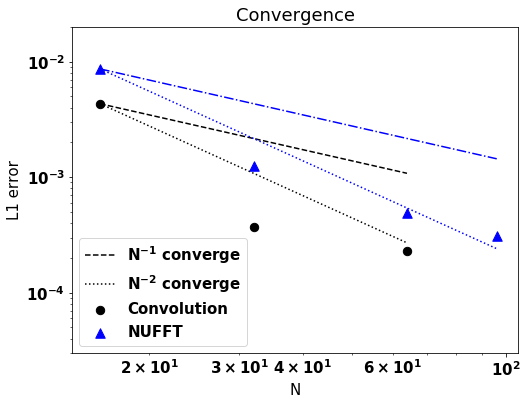

In [24]:
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))


plt.scatter(convl_resolution, convl_L1_list, color='k', marker="o", s=70, label="Convolution")
plt.scatter(nufft_resolution, nufft_L1_list, color='b', marker="^", s=90, label="NUFFT")

plt.plot([convl_resolution[0], convl_resolution[-1]],
         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-1.0)], 
         linestyle="--", color="k", label=r"N$^{-1}$ converge")

plt.plot([convl_resolution[0], convl_resolution[-1]],
         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-2.0)], 
         linestyle=":", color="k", label=r"N$^{-2}$ converge")

plt.plot([nufft_resolution[0], nufft_resolution[-1]],
         [nufft_L1_list[0], nufft_L1_list[0]*(nufft_resolution[-1]/nufft_resolution[0])**(-1.0)], 
         linestyle="-.", color="b")

plt.plot([nufft_resolution[0], nufft_resolution[-1]],
         [nufft_L1_list[0], nufft_L1_list[0]*(nufft_resolution[-1]/nufft_resolution[0])**(-2.0)], 
         linestyle=":", color="b")


plt.xscale("log")
plt.yscale("log")

plt.ylim(3e-5, 2e-2)

plt.title("Convergence")

plt.xlabel("N")
plt.ylabel("L1 error")

plt.legend(loc="best", fontsize=15)

## Plot Rho

In [18]:
rho_array = spheres.get_rho()

Text(0.5,0.98,'N = 64')

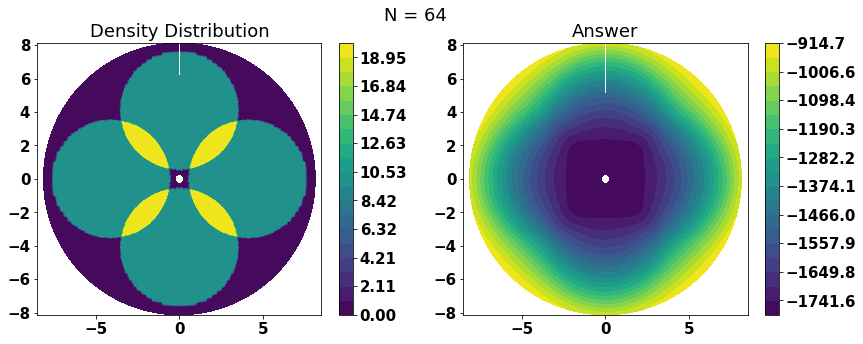

In [19]:
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(14, 5))

plan = int(NN/2)

plt.subplot(121)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], rho_array[:,:,plan], 
             levels=np.linspace(np.min(rho_array[:,:,plan]), np.max(rho_array[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Density Distribution")
plt.colorbar()

plt.subplot(122)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN))

Text(0.5,0.98,'N = 64')

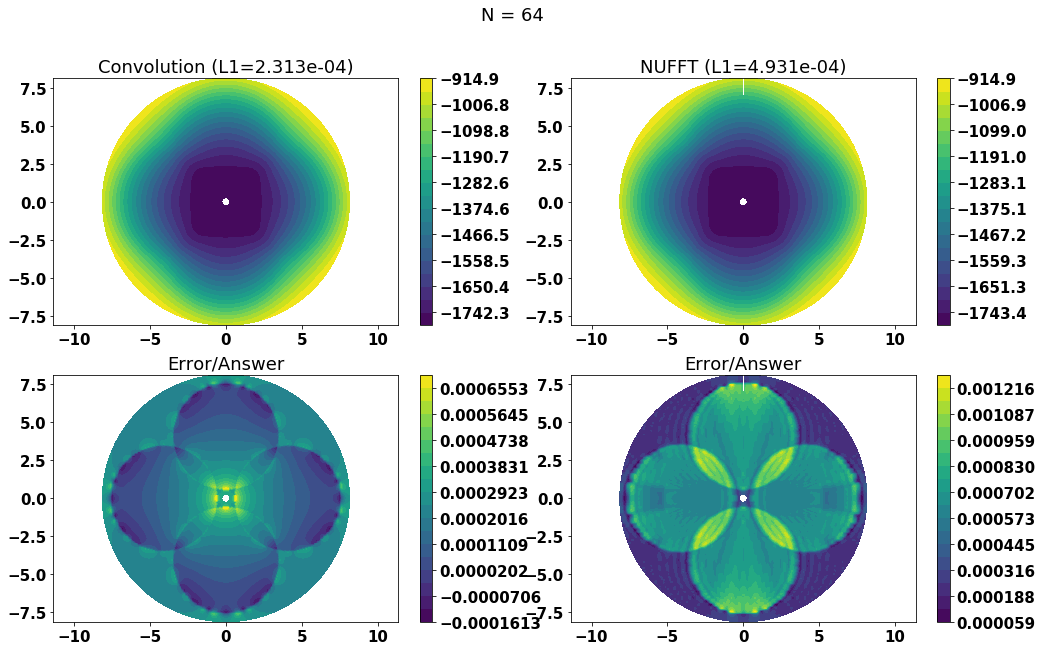

In [20]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution (L1=" + format(convl_L1, ".3e") + ")")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT (L1=" + format(nufft_L1, ".3e") + ")")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN))

Text(0.5,0.98,'N = 64, L1 = 0.000231305265986')

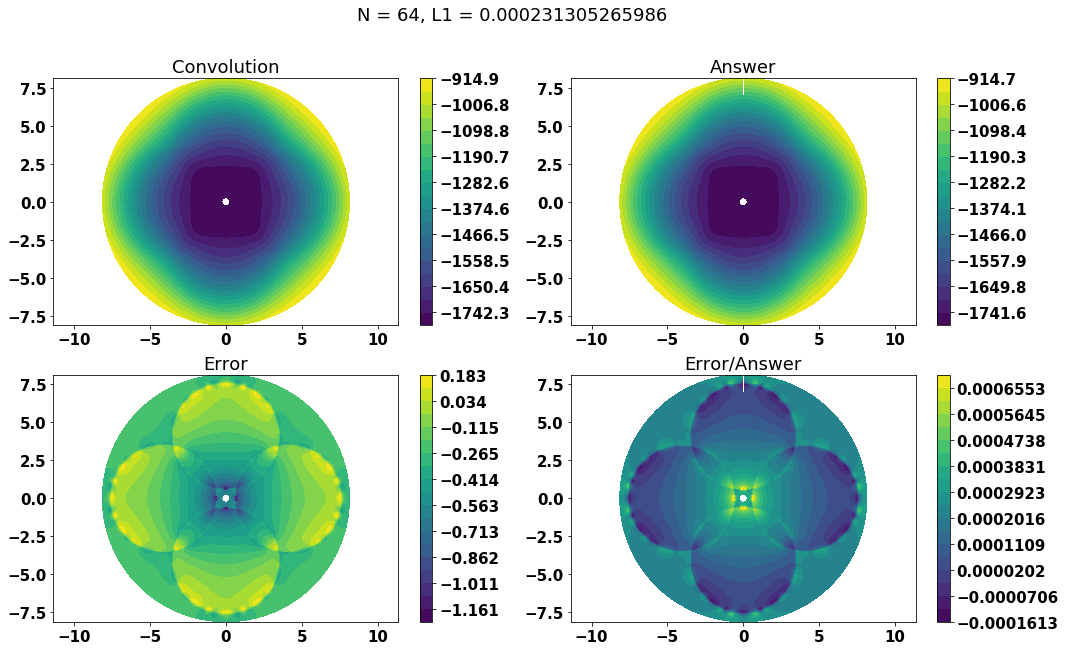

In [21]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error[:,:,plan], 
             levels=np.linspace(np.min(convl_error[:,:,plan]), np.max(convl_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(convl_L1))

Text(0.5,0.98,'N = 64, L1 = 0.000493133030709')

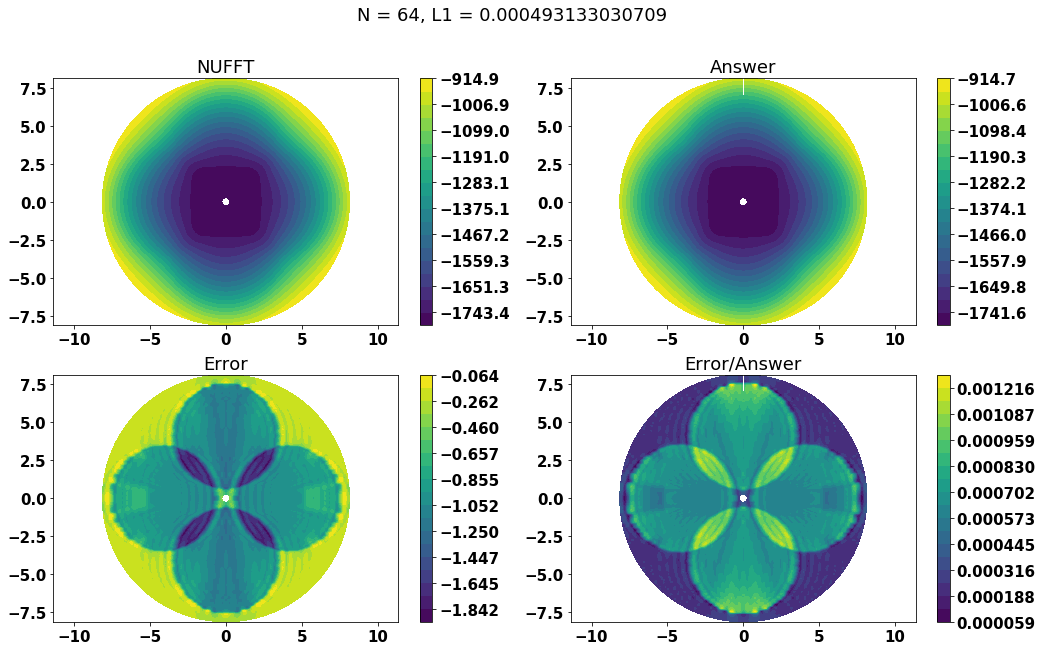

In [22]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_analytic[:,:,plan], 
             levels=np.linspace(np.min(nufft_analytic[:,:,plan]), np.max(nufft_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error[:,:,plan], 
             levels=np.linspace(np.min(nufft_error[:,:,plan]), np.max(nufft_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(nufft_L1))